In [1]:
import re
import imgaug as ia
from imgaug import augmenters as iaa
import imageio
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
ia.seed(1)

batch_size = 10
visible_batch_size = 4

In [2]:
sample_img = imageio.imread('original_sample.jpg', pilmode="RGB")
mask_img = imageio.imread('original_sample_mask.jpg', pilmode="RGB")

original_smpl = np.array(sample_img, dtype=np.uint8)
original_mask = np.array(mask_img, dtype=np.uint8)

In [3]:
seq = iaa.SomeOf(1, [
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.9, 1.1), "y": (0.8, 1.2)},
        rotate=(-2, 2),
        shear=(-30, 30),
        mode='wrap'
    )
])

In [4]:
original_smpl_arr_aug = []
original_mask_arr_aug = []
for i in range(batch_size):
    _aug = seq._to_deterministic()
    original_smpl_arr_aug.append(_aug.augment_image(original_smpl))
    original_mask_arr_aug.append(_aug.augment_image(original_mask))

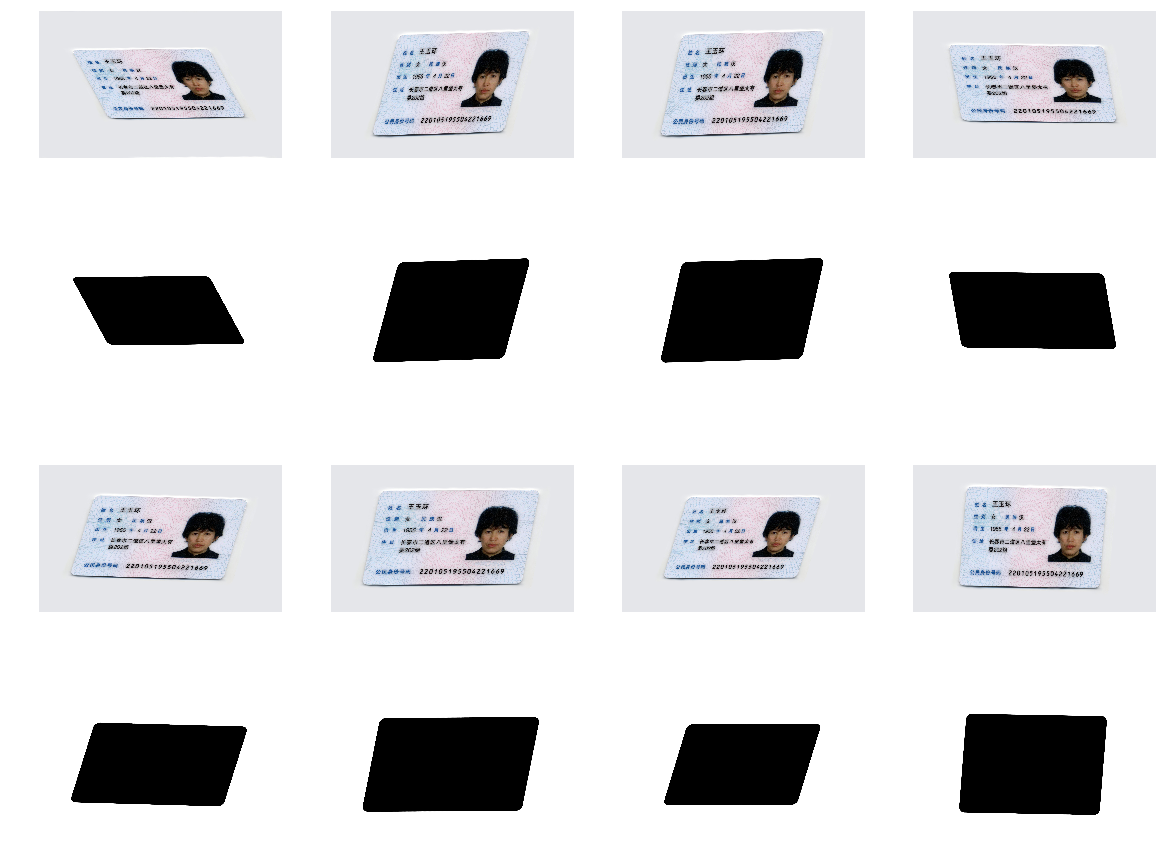

In [10]:
train_x = original_smpl_arr_aug
train_y = original_mask_arr_aug
fig, axes = plt.subplots(4, visible_batch_size, figsize=(20, 16))
for k in range(visible_batch_size):
    axes[0,k].set_axis_off()
    axes[0,k].imshow(train_x[k])
    axes[1,k].set_axis_off()
    axes[1,k].imshow(train_y[k].squeeze())
    axes[2,k].set_axis_off()
    axes[2,k].imshow(train_x[k+visible_batch_size])
    axes[3,k].set_axis_off()
    axes[3,k].imshow(train_y[k+visible_batch_size].squeeze())